In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as sci

In [3]:
# Import the csv containing Cytokine data
cytokine = pd.read_csv('../Datasets/Cytokine.csv').set_index('ID')
cytokine.drop(columns=['Constipated'],inplace=True)
data = pd.read_csv('../Datasets/clean.csv').set_index('ID')
cytokine.rename(inplace=True,columns=
                {
                    'IL-6':'IL6',
                    'IL-8':'IL8',
                    'IL-10':'IL10',
                    'IL-1B':'IL1B',
                    'TNF-Alpha':'TNFAlpha',
                    'Palsy Constipated QOLS':'QOLS'
                })
cytokine['QOLS'] = cytokine['QOLS'].apply(lambda x: 100-x)

In [4]:
# Subject breakdown
print('Number of Subjects: {}\nNumber of Constipated Subjects: {}\nNumber of Non-Constipated Subjects: {}' .format(len(cytokine['CONSTIPATION']),*cytokine['CONSTIPATION'].value_counts()))

Number of Subjects: 37
Number of Constipated Subjects: 24
Number of Non-Constipated Subjects: 13


In [5]:
cytokine_percentiles = cytokine.copy()

In [6]:
percentiles = np.percentile(cytokine_percentiles['QOLS'],[10*i for i in range(0,10)])

for index, row in cytokine_percentiles.iterrows():
    for i in range(0,len(percentiles)):
        if row['QOLS'] >= percentiles[i]:
            cytokine_percentiles.loc[index,'QOLS'] = i*10

In [7]:
est = {}
const_est = {}
nconst_est = {}
estimates = [est,const_est,nconst_est]
const = cytokine_percentiles.loc[cytokine_percentiles['CONSTIPATION'] == True]
nconst = cytokine_percentiles.loc[cytokine_percentiles['CONSTIPATION'] == False]
for cyt in cytokine_percentiles.columns[-6:-1]:
    ind = list(cytokine_percentiles.columns[-6:-1].values).index(cyt)
    #sns.lmplot(data=df_plt,x='QOLS',y=cyt,hue='CONSTIPATION',height=4,n_boot=5000,ci=25)
    c_data = [
            [cytokine_percentiles[cyt],cytokine_percentiles['QOLS']],
            [const[cyt],const['QOLS']],
            [nconst[cyt],nconst['QOLS']]
           ]
    for d,e in zip(c_data, estimates):
        rho,pval = sci.spearmanr(*d)
        e[cyt] = {'rho':rho, 'pval':pval}

In [8]:
print(('Spearman Correlation of Quality of Life').center(55,' '))
print(('as Affected by Inflammatory Cytokines:').center(55,' '))
print(('Split by Presence of Constipation').center(55,' '))
print('\n')
for cyt in est:
    print((cyt).center(55,'='))
    print('\n\tAll\t\tConstipated\tNon-Constipated\n')
    for k in est[cyt]:
        print('{}\t{:.3f}\t\t{:.3f}\t\t{:.3f}'.format(k,est[cyt][k],const_est[cyt][k],nconst_est[cyt][k]))
    print('\n')

        Spearman Correlation of Quality of Life        
         as Affected by Inflammatory Cytokines:        
           Split by Presence of Constipation           


==========================QOLS=========================

	All		Constipated	Non-Constipated

rho	1.000		1.000		1.000
pval	0.000		0.000		0.000


==========================IL1B=========================

	All		Constipated	Non-Constipated

rho	-0.491		-0.175		-0.221
pval	0.002		0.413		0.469


========================TNFAlpha=======================

	All		Constipated	Non-Constipated

rho	-0.148		-0.088		0.106
pval	0.381		0.683		0.730


==========================IL6==========================

	All		Constipated	Non-Constipated

rho	-0.037		0.178		0.091
pval	0.827		0.405		0.767


==========================IL8==========================

	All		Constipated	Non-Constipated

rho	-0.211		-0.122		0.286
pval	0.209		0.570		0.344




/Users/reveloff/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/reveloff/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/reveloff/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/reveloff/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/reveloff/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(Use

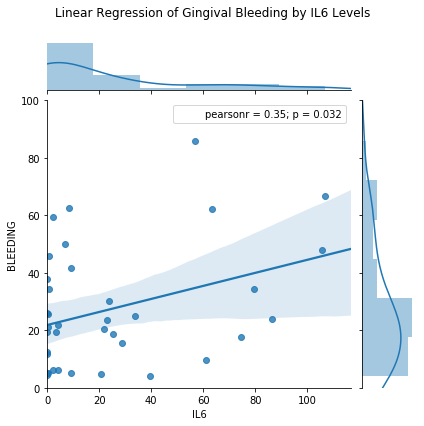

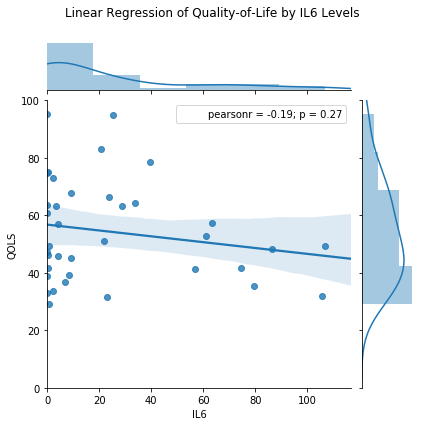

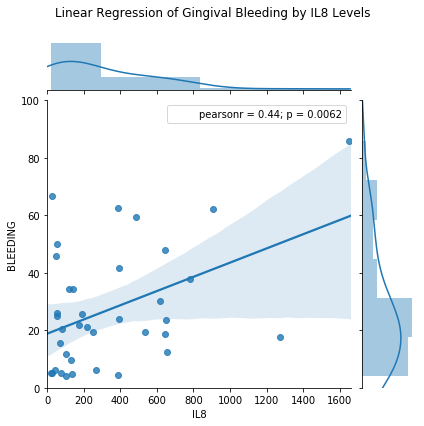

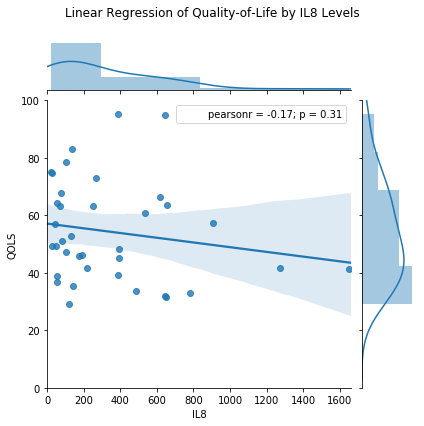

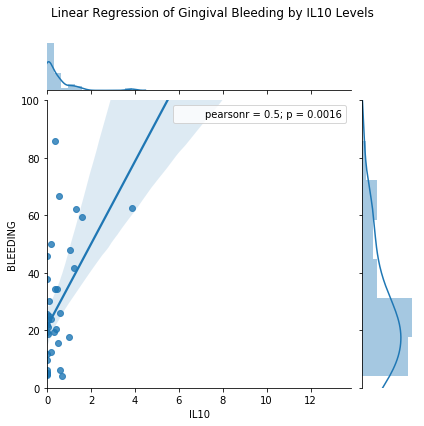

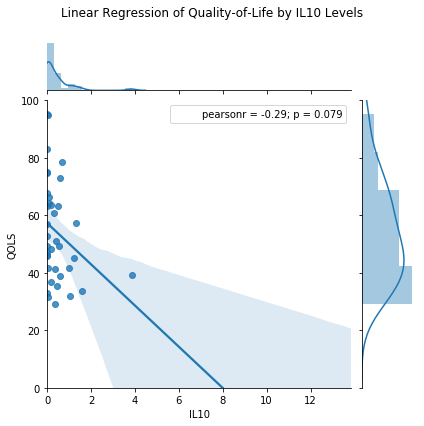

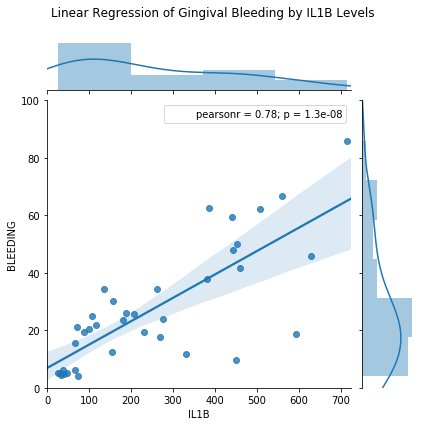

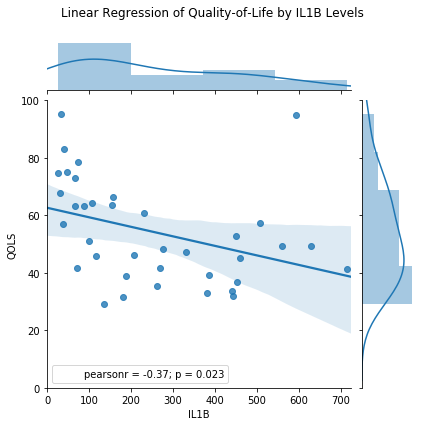

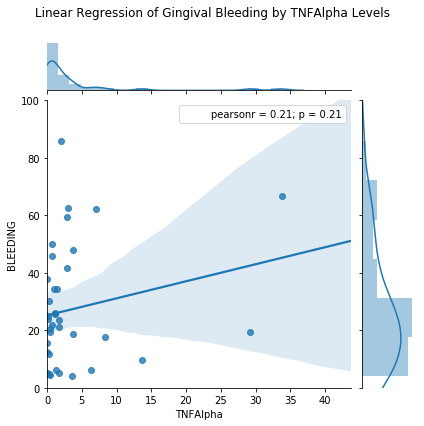

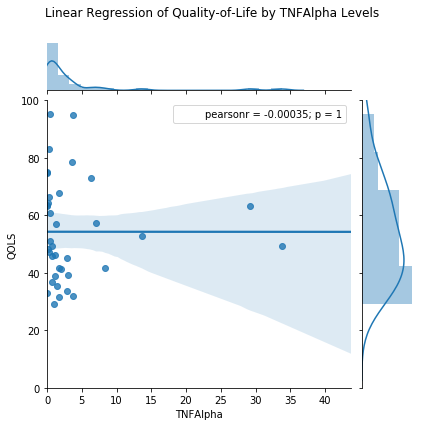

In [9]:
def r2(x, y):
    return sci.pearsonr(x, y)[0] ** 2

cytokine_list = ['IL6','IL8','IL10','IL1B','TNFAlpha']

for cyt in cytokine_list:
    slope, intercept, r_value, p_value, std_err = sci.linregress(cytokine[cyt],cytokine['QOLS'])
    cyt_bleeding = sns.jointplot(data=cytokine,x=cyt, y='BLEEDING', kind="reg",xlim=(0,max(cytokine[cyt].values)+10),ylim=(0,100))
    cyt_bleeding.annotate(sci.pearsonr)
    cyt_bleeding.fig.subplots_adjust(top=.9)
    cyt_bleeding.fig.suptitle('Linear Regression of Gingival Bleeding by {} Levels' .format(cyt))
    plt.savefig('../Figures/cytokine_bleeding_{}.png'.format(cyt))
    
    cyt_qols = sns.jointplot(data=cytokine,x=cyt, y='QOLS', kind="reg",xlim=(0,max(cytokine[cyt].values)+10),ylim=(0,100))
    cyt_qols.annotate(sci.pearsonr)
    cyt_qols.fig.subplots_adjust(top=.9)
    cyt_qols.fig.suptitle('Linear Regression of Quality-of-Life by {} Levels' .format(cyt))
    plt.savefig('../Figures/cytokine_qols_{}.png'.format(cyt))

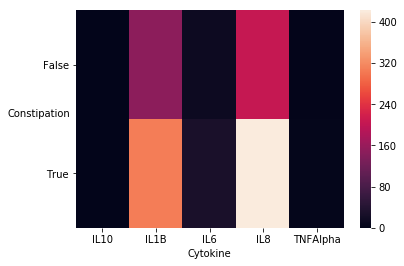

In [114]:
piv = pd.pivot_table(data, values=['IL6','IL8','IL10','IL1B','TNFAlpha'],index=['CONSTIPATION'], fill_value=0)
piv_norm = piv.copy()
sns.heatmap(piv)
plt.yticks(rotation=0)
plt.ylabel('Constipation',rotation=0)
plt.xlabel('Cytokine')
plt.savefig('../Figures/cytokine_heatmap.png')

In [115]:
piv_norm['IL6'][True] = piv_norm['IL6'][True]/piv_norm['IL6'][False]
piv_norm['IL6'][False] = 1
piv_norm['IL8'][True] = piv_norm['IL8'][True]/piv_norm['IL8'][False]
piv_norm['IL8'][False] = 1
piv_norm['IL10'][True] = piv_norm['IL10'][True]/piv_norm['IL10'][False]
piv_norm['IL10'][False] = 1
piv_norm['IL1B'][True] = piv_norm['IL1B'][True]/piv_norm['IL1B'][False]
piv_norm['IL1B'][False] = 1
piv_norm['TNFAlpha'][True] = piv_norm['TNFAlpha'][True]/piv_norm['TNFAlpha'][False]
piv_norm['TNFAlpha'][False] = 1

In [146]:
piv

,IL10,IL1B,IL6,IL8,TNFAlpha
CONSTIPATION,,,,,
False,0.156154,150.102308,14.735385,205.715385,2.394615
True,0.567083,307.292500,29.662500,422.205833,4.365833


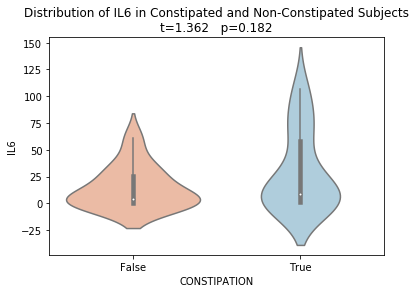

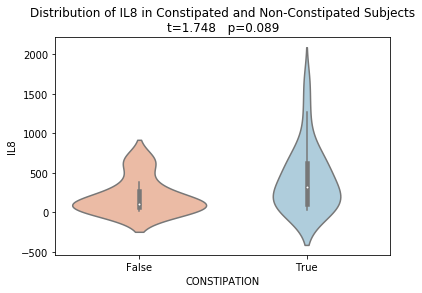

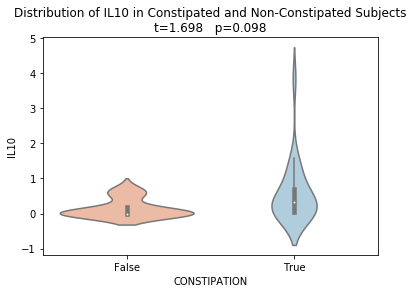

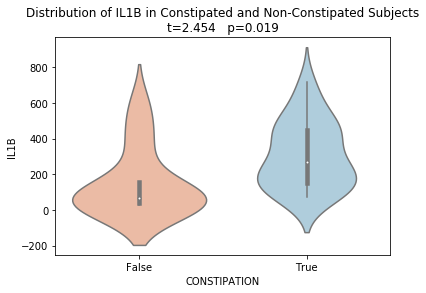

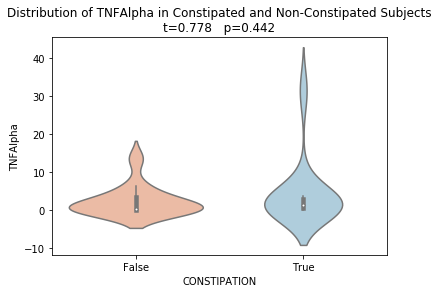

In [192]:
data_cyt = data.dropna(subset=cytokine_list)
for cyt in cytokine_list:
    stat,pval = sci.ttest_ind(data_cyt[data_cyt['CONSTIPATION'] == True][cyt],data_cyt[data_cyt['CONSTIPATION'] == False][cyt])
    #print('T-stat: {:.3f}\nP-value: {:.3f}' .format(stat,pval))
    vi = sns.violinplot(data=data_cyt,y=cyt,x='CONSTIPATION',split=True,palette='RdBu')
    
    vi.set_title('Distribution of {} in Constipated and Non-Constipated Subjects\nt={:.3f}   p={:.3f}' .format(cyt,stat,pval))
    
    plt.savefig('../Figures/{}_violin.png' .format(cyt))
    
    plt.show()
    